#Natural Language Processing is used in cases of text or unstructured text data. It's used to group news articles by topics, to find relevant pages from thousands of legal documents. NLP works by 1. compiling documents, 2. featurize them(documents), 3. compare their features.

#Example: imagine we have 2 documents- blue house and red house. We featurize them based off on word counts. Transform blue house and red house into a vectorize word counts i.e create a vector count of all present words, which are: RED,BLUE,HOUSE. put 1 where the word is present and put zero where the word is not present. Blue house:(red,blue,house)=(0,1,1) and Red house:(red,blue,house)=(1,0,1).

#A document represented as vector of word counts is known as a bag of words. once we have bag of words, you can use cosine similarity of the vectors to determine the similarity of the documents themselves. Cosine(@)= (A.B)/|A||B|. This is useful to determine how similar each text is to eachother.

#We can improve the Bag of Words by adjusting word counts based on their frequency in corpus(group of all documents). Term Frequency(TF): importance of term within that document and Inverse Document Frequeny(IDF): importance of the term in the corpus. TF(t,d): importance of term t in document d. IDF(t)=log(D/t): importance of term in the corpus where D is the total number of documents and t is the number of documents with the term. 

#Mathematically, w(x,y) = tf(x,y) * log(N/x). This is done not just bcos of word counts, but to get the notation on how important a word is not just to the document but to the entire corpus. Use conda install ntlk or pip install ntlk on anaconda prompt to enable us work with text on NLP.

# NLP with Python: Part 1

#nltk comes with dataset that are necessary inorder for it to operate in certain ways. It has a list of packages, list packages and download stopwords package. Quit after that

In [1]:
import nltk

In [2]:
#nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp

        C:\Users\emman\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


#SMS spam collection dataset got from UCI machine learning repository. This dataset is a text data which is classified as spam or ham to build spam detection filter with python

#to read the text data:

In [2]:
messages = [line.rstrip() for line in open("C:\\Users\\emman\\kaggle datasets\\SMSSpamCollection")]

In [3]:
len(messages)               #length of messages

5574

In [4]:
messages[0],messages[100],messages[5000]

('ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 "ham\tPlease don't text me anymore. I have nothing else to say.",
 'ham\tHmph. Go head, big baller.')

#to enumerate the first ten sentences:

In [5]:
for mess_num, message in enumerate(messages[:10]):
    print(mess_num,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [6]:
#for line in open("C:\\Users\\emman\\kaggle datasets\\SMSSpamCollection"):            NB:same as list comprehension above.
   # print(line.rstrip())

#to read our text data with pandas. '\t' shows it's tab separated.

In [7]:
import pandas as pd

In [8]:
messages = pd.read_csv("C:\\Users\\emman\\kaggle datasets\\SMSSpamCollection",sep='\t',names=['labels','message'])

In [9]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#to check statistics:

In [10]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#to get label ham and spam messages:

In [11]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

#the length of each messages

In [12]:
messages['length'] = messages['message'].apply(len)

In [13]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#visualize the messages

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

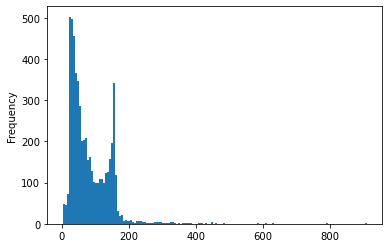

In [15]:
messages['length'].plot.hist(bins=150)

#to get the stattistics of message length

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

#find the message with the max length

In [17]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

C:\Users\emman\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


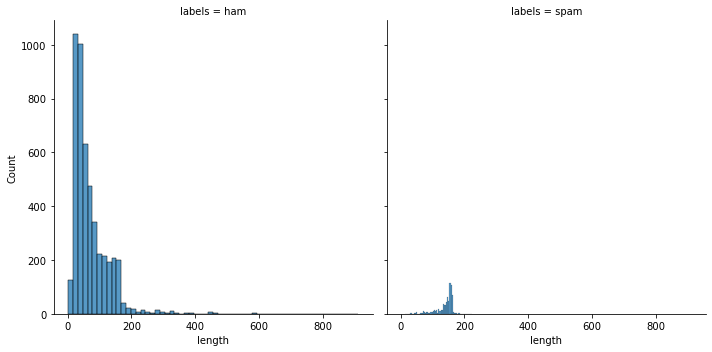

In [18]:
g = sns.FacetGrid(messages,col='labels',size=5)
g.map(sns.histplot,'length',bins=60)                        

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

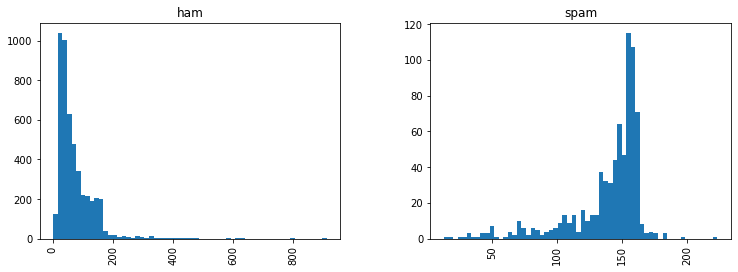

In [19]:
messages.hist(column='length',by='labels',bins=60,figsize=(12,4))           #same as above plot

# NLP with Python: Part 2

#we preprocess our texts(corpus) by converting them to numerical or vector forms i.e bag of words, where one unique word in a text is known by a number 

#firstly, to remove punctuation

In [20]:
import string

In [21]:
# as an example

mess = 'Sample message! Notice: it has punctuation.'

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
# use list comprehension to pass in every character and check if it's not in string punctuation: to remove punctuation.

nopunc = [c for c in mess if c not in string.punctuation]

In [24]:
nopunc                #when all punctuations are removed from mess.

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

#To remove stop words

In [25]:
#import stop words from nltk

from nltk.corpus import stopwords

In [26]:
stopwords.words('english')           #these words are features that are not helpful in detecting ham or spam mails.

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
#join the nopunc characters when all punctuations are removed because they are a list of letters..

nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
#examples of join method

x = ['a','b','c']
y = '$'.join(x)

In [31]:
x

['a', 'b', 'c']

In [32]:
y

'a$b$c'

In [33]:
#use list comprehension to remove stopwords in nopunc

clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

#putting string.punctuation and stopwords.word('english') into a function to apply into entire dataframe

In [35]:
def text_process(mess):
    '''
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [36]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
#apply the above function to message column from messages to convert text strings to list of tokens(clean version of words)

messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

#converting list of tokens into vectors so scikitlearn algorithm models can worked with. 1.count how many times does a word occur in each message (known as term frequency). 2.Weigh the counts so that frequent tokens get lower weight(inverse document frequency). 3.Normalize the vectors to unit length to abstract from the original text length.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#input the function into analyzer and fit the message column to get the vectors. bow = bag of words

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [40]:
#print the total number of vocabulary words

print(len(bow_transformer.vocabulary_))

11425


#Example of message index into vector words count(bag of words)

In [41]:
mess4 = messages['message'][3]

In [42]:
mess4

'U dun say so early hor... U c already then say...'

In [43]:
bow4 = bow_transformer.transform([mess4])

In [44]:
print(bow4)      #7 unique words after removing stopwords and 2 appeared twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [45]:
#print the shape of bow4

print(bow4.shape)

(1, 11425)


In [46]:
#to get words that appeared twice. get_feature_names is outdated, use get_feature_names_out instead.


bow_transformer.get_feature_names_out()[4068], bow_transformer.get_feature_names_out()[9554]

('U', 'say')

# NLP with Python: Part 3

#to transfrom the entire dataframe of messages into vector form

In [47]:
messages_bow = bow_transformer.transform(messages['message'])

In [48]:
print('Shape of Sparse Matrix', messages_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [49]:
#amount of non-zero occurencies

messages_bow.nnz

50548

In [50]:
#get sparsity... the number of non zeros to number of messages.

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity : {}'.format((sparsity)))

sparsity : 0.07940295412668218


#To get weight and normalization using term frequency and inverse document frequency

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [52]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [53]:
#to get the weight and normalizaton of the fourth message:

tfidf4 = tfidf_transformer.transform(bow4)

In [55]:
print(tfidf4)                  #below gives the relationahip between term frquency and inverse document frequency 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [57]:
#check the inverse document frequency of any particular word: eg. university

tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [59]:
#convert entire bag of words corpus into idf corpus at one

messages_tfidf = tfidf_transformer.transform(messages_bow)

In [63]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

# train ham/spam classifer

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])

In [69]:
#test model on tfidf4. tfidf4 indicates it's a ham

spam_detect_model.predict(tfidf4)[0]

'ham'

In [71]:
#see if our model predicted correctly:

messages['labels'][3]

'ham'

In [72]:
#check if our model predicted correctly on all messages

all_pred = spam_detect_model.predict(messages_tfidf)

In [73]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# train/test/split of our data

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['labels'],test_size=0.3)

#NB: scikit-learn has a pipeline command to resolve text data instead of doing the above solutions. Pipeline takes the steps argument by passing a list of everything you want to do (preprocessing)

In [76]:
from sklearn.pipeline import Pipeline

In [78]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())])

In [79]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000027EE46BC280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [80]:
predictions = pipeline.predict(msg_test)

In [81]:
#Evaluation:

from sklearn.metrics import classification_report

In [82]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1430
        spam       1.00      0.67      0.80       242

    accuracy                           0.95      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.95      0.95      1672



In [83]:
#using random forest classifier instead MultinomialNB

from sklearn.ensemble import RandomForestClassifier

In [84]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),('tfidf',TfidfTransformer()),
                     ('classifier',RandomForestClassifier())])

In [85]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000027EE46BC280>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [87]:
pred = pipeline.predict(msg_test)

In [88]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1430
        spam       1.00      0.76      0.86       242

    accuracy                           0.96      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.96      0.96      1672



In [89]:
from sklearn.metrics import confusion_matrix

In [91]:
print(confusion_matrix(label_test,pred)), print(confusion_matrix(label_test,predictions)) 

[[1430    0]
 [  59  183]]
[[1430    0]
 [  79  163]]


(None, None)

# Natural Language Processing Project and Solutions

#This project involves classifying Yelp reviews into 1-star or 5-star category based off the text content in the reviews. 

#Import the usual suspects, read the yelp.csv file and set it as a dataframe called yelp. Check the head, info and describe method on yelp.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
yelp = pd.read_csv("C:\\Users\\emman\\kaggle datasets\\yelp.csv")

In [94]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [95]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [116]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


#Use FacetGrid to create a grid of 5 histograms of text length based off the star ratings.

In [123]:
#to create text length column.

yelp['text length'] = yelp['text'].apply(len)

In [124]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


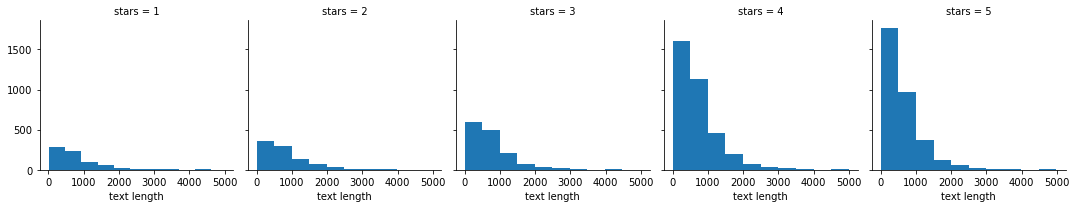

In [128]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

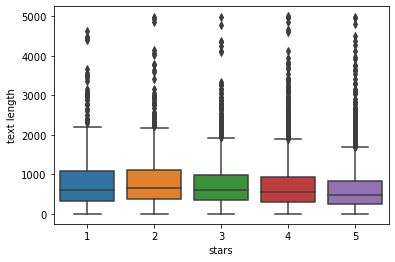

In [130]:
#Create a boxplot of text length for each star category

sns.boxplot(data=yelp,y='text length',x='stars')

<AxesSubplot:xlabel='stars', ylabel='count'>

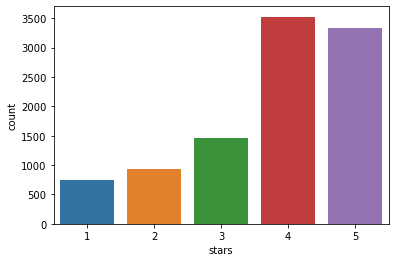

In [131]:
#Create a countplot of number of occurencies for each type of star rating

sns.countplot(data=yelp,x='stars')

In [136]:
#Use groupby to get the mean values of the numerical columns.

yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [137]:
#use the corr method on the above groupby dataframe

yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

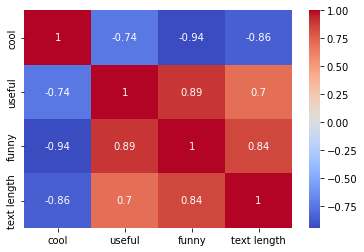

In [141]:
#create a heatmap

sns.heatmap(yelp.groupby('stars').mean().corr(),annot=True,cmap='coolwarm')

# NLP Classification Task

#Grab reviews that were either 1 star or 5 star, create a dataframe called yelp_class that contains the column of yelp dataframe but for the only 1 or 5 star reviews.

In [142]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text length'],
      dtype='object')

In [165]:
yelp_class = yelp[(yelp['stars']==5) | (yelp['stars']==1)]

In [166]:
yelp_class

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [167]:
yelp_class['stars'].value_counts()      #just to get the counts of stars column

5    3337
1     749
Name: stars, dtype: int64

#create 2 objects X and Y. X will be text column of yelp_class and Y will be stars column of yelp_class. (Features and target/labels)

In [241]:
X = yelp_class['text']
y = yelp_class['stars']

#import Countvectorizer and create a CountVectorizer object. Use the fit_transform on the CountVectorizer and pass the X('text column') and save this result by overwriting X.

In [242]:
from sklearn.feature_extraction.text import CountVectorizer

In [243]:
CV = CountVectorizer()

In [244]:
X = CV.fit_transform(X)

# Train Test Split

In [245]:
#Split data into training data and testing data with train_test_split. set test_size = 0.3 and random_state=101

from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training a Model

In [247]:
#Import MultinomialNB and create an instance of the estimator called nb. Fit nb using the training data

from sklearn.naive_bayes import MultinomialNB

In [248]:
nb = MultinomialNB()

In [249]:
nb.fit(X_train,y_train)

MultinomialNB()

# Predictions and Evaluation

#Use predict method off of nb and predict labels from X_test, then create a confusion matrix and classification report for this predictions and y_test

In [250]:
predictions = nb.predict(X_test)

In [251]:
print(predictions)

[5 1 5 ... 5 5 5]


In [252]:
from sklearn.metrics import classification_report,confusion_matrix

In [253]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [254]:
print(confusion_matrix(y_test,predictions))

[[159  69]
 [ 22 976]]


# Using Text Processing

In [255]:
#import TfidfTransformer and Pipeline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [256]:
#now create a pipeline with the following steps: Countvectorizer(),TfidfTransformer,MultinomialNB()

pipeline = Pipeline([('cv',CountVectorizer()),('tdidf',TfidfTransformer()),('NB',MultinomialNB())])

In [257]:
yelp_class['text'].iloc[200]                   #to check for full text of 200 with index

"I have now visited Herb n' Flavors several times. I love supporting local businesses who have sustainable practices. This place uses local farms for their produce, safe from GMO's and pesticides. So, I was already a fan before I walked in! Everything I have tried has been delicious, and the owner is such a cool guy- always so friendly to the customers. The food always tastes so fresh, and full of flavor! They have a little something for everyone. I am a gluten free vegan and my husband has no dietary restrictions. We always both leave happy. I definitely recommend this place. I would like to see their business continue to grow and stick around for a long time! :)"

In [258]:
#to check the star rating of the 200th text

yelp_class[['stars','text']].iloc[200]

stars                                                    5
text     I have now visited Herb n' Flavors several tim...
Name: 461, dtype: object

In [261]:
#pipeline.fit(X_train.lower(),y_train.lower())       #check back for this later